<a href="https://colab.research.google.com/github/judyssc/MachineLearning/blob/master/SVM_Yvonne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time

In [0]:
df = pd.read_csv('heart.csv').dropna() #Drop rows if they contain missing values
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


'Target' column is the output. We want to predict if a patient has heart disease or not.

In [0]:
df_yes = df[df['target'] == 0]
df_no = df[df['target'] == 1]
df_yes.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


We have selected 'trestbps' which is resting blood pressure and 'chol' which is serum cholestrol as our first set of independent variables.

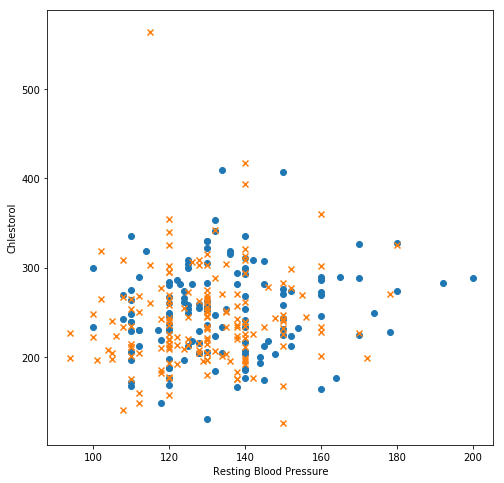

In [0]:
fix,ax=plt.subplots(figsize=(8,8))
ax.scatter(df_yes['trestbps'], df_yes['chol'], marker='o')
ax.scatter(df_no['trestbps'], df_no['chol'], marker='x')
ax.set(xlabel='Resting Blood Pressure', ylabel='Chlestorol')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X = df[['chol', 'trestbps']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,chol,trestbps
287,232,154
282,218,126
197,254,125
158,220,125
164,175,138


In [0]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.03490447998046875


In [0]:
# import our model and train it
from sklearn.svm import SVC

svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight='balanced', random_state=42)
svMachine.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# let the model predicts  and show the results
y_pred = svMachine.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.6052631578947368

The accuracy score is only 60.53% with training duration of 0.051s. 
We will then need to perform feature engineering to increase the accuracy score. 

In [0]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


According to the above correlation table, we have 'thalach' and 'oldpeak' columns as our second set of independent variables.

In [0]:
from sklearn.model_selection import train_test_split

X = df[['thalach','oldpeak']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,thalach,oldpeak
287,164,0.0
282,134,2.2
197,163,0.2
158,144,0.4
164,173,0.0


In [0]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.05788779258728027


In [0]:
# import our model and train it
from sklearn.svm import SVC

svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight='balanced', random_state=30)
svMachine.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=30, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred = svMachine.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.7631578947368421

The accuracy score increases up to 76.32% with slightly longer training duration.

As 3rd feature, 'age' is added to our model.

In [0]:
from sklearn.model_selection import train_test_split

X = df[['thalach', 'oldpeak', 'age']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,thalach,oldpeak,age
287,164,0.0,57
282,134,2.2,59
197,163,0.2,67
158,144,0.4,58
164,173,0.0,38


In [0]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.048906803131103516


In [0]:
# import our model and train it
from sklearn.svm import SVC

svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight='balanced', random_state=30)
svMachine.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=30, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred = svMachine.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.7763157894736842

The accuracy score is slightly increased to 77.63% with shorter training duration of 0.049s.

As 4th feature, exercise induced angina, called 'exang' is added to our model.

In [0]:
from sklearn.model_selection import train_test_split

X = df[['thalach', 'oldpeak', 'age', 'exang']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,thalach,oldpeak,age,exang
287,164,0.0,57,0
282,134,2.2,59,0
197,163,0.2,67,0
158,144,0.4,58,0
164,173,0.0,38,0


In [0]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.03494620323181152


In [0]:
# import our model and train it
from sklearn.svm import SVC

svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight='balanced', random_state=30)
svMachine.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=30, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred = svMachine.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8026315789473685

With 4th feature, the accuracy score is imporved to 80.26% with slight decrease in training time.



As 5th feature, 'cp' which is chest pain types, is added to our model.

In [0]:
from sklearn.model_selection import train_test_split

X = df[['thalach', 'oldpeak', 'age','exang', 'cp']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,thalach,oldpeak,age,exang,cp
287,164,0.0,57,0,1
282,134,2.2,59,0,2
197,163,0.2,67,0,0
158,144,0.4,58,0,1
164,173,0.0,38,0,2


In [0]:
from sklearn.svm import SVC
start=time.time()
svClassifier = SVC(kernel='linear',gamma='scale')
svClassifier.fit(X_train,y_train)
end=time.time()
print(end-start)

0.029918909072875977


In [0]:
# import our model and train it
from sklearn.svm import SVC

svMachine = SVC(kernel = 'linear', gamma = 'auto', class_weight='balanced', random_state=30)
svMachine.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=30, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred = svMachine.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8552631578947368

The testing of 5 features will give the accuracy score of 85.53% with training duration of 0.029s.